---
# 02. Tarea

Carlos Andrés del Valle (cdelv@unal.edu.co)

---

# Ejercicio 1,  Ley de Desplazamiento de Wien

La ley de radiación de Planck establece que la intensidad I de la radiación por unidad de área y por unidad de longitud de onda $\lambda$ de un cuerpo negro con una temperatura T es 


\begin{equation}
     I(\lambda)=\frac{2\pi h c^2 \lambda^{-5}}{e^{\frac{h c}{\lambda k_B T}}-1}
\end{equation}

donde $h$ es la constante de Planck, c es la rapidez de la luz en el vacio y $k_B$ es la constante de Boltzmann.

---

## A) 

Escriba una función que grafique la intensidad de Planck en función de $\lambda$ para una temperatura T dada.


---

Para esto, voy a usar el módulo de constantes físicas y unidades de Julia. Todo en unidades SI.

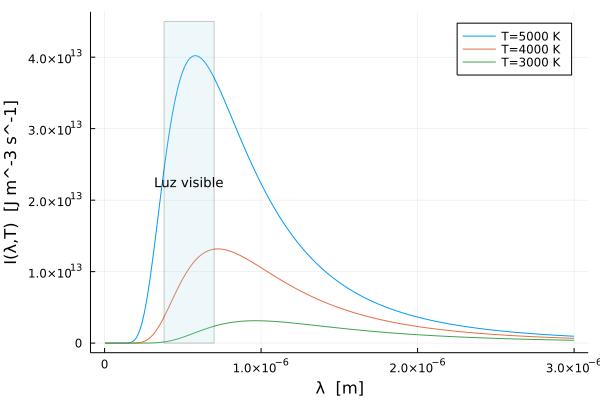

In [1]:
import PhysicalConstants.CODATA2018: c_0, h, k_B 
using Unitful
using Plots

I(λ,T)=(2*π*h*c_0^2*λ^(-5))/(exp(h*c_0/(λ*k_B*T))-1) #funcion de la radiacion de planck

λ=LinRange(0,3,1000)u"μm"
λ=uconvert.(u"m",λ)
T1=5000u"K"
T2=4000u"K"
T3=3000u"K"
I1= I.(λ,T1)
I2= I.(λ,T2)
I3= I.(λ,T3)

rectangle(w, h, x, y) = Shape(x .+ [0,w,w,0], y .+ [0,0,h,h])
lim1 = 380u"nm"
lim2 = 700u"nm"
lim1=ustrip(uconvert.(u"m",lim1))
lim2=ustrip(uconvert.(u"m",lim2))

plot(ustrip.(λ),ustrip.(I1),label="T=$T1")
plot!(ustrip.(λ),ustrip.(I2),label="T=$T2")
plot!(ustrip.(λ),ustrip.(I3),label="T=$T3")
plot!(rectangle(lim2-lim1,4.5*10^13,lim1,0), opacity=.2, color=:lightblue, label="")
annotate!((lim1+lim2)/2, 4.5*10^13/2, text("Luz visible", 9))

xlabel!("λ  [$(unit(λ[1]))]")
ylabel!("I(λ,T)  [$(unit(I1[1]))]")

## B) 


Utilice la derivada de esta expresión para mostrar que la longitud de onda $\lambda_m$ en la que se tiene el máximo de la intensidad satisface la ecuación

\begin{equation}
         5e^{-\frac{hc}{\lambda_mk_B T}}+\frac{hc}{\lambda_mk_B T}-5=0.
\end{equation}

---

Lo primero es derivar la expresión de la intensidad, de modo que
\begin{equation}
    \begin{split}
    &\left.\frac{d}{d\lambda}I(\lambda)\right|_{\lambda=\lambda_m} = \left.\frac{d}{d\lambda}\right|_{\lambda=\lambda_m} \frac{2\pi h c^2 \lambda^{-5}}{e^{\frac{h c}{\lambda k_B T}}-1},\\
    &\left.\frac{d}{d\lambda}I(\lambda)\right|_{\lambda=\lambda_m} = -\frac{10 \, \pi c^{2} h}{\lambda_m^{6} {\left(e^{\left(\frac{c h}{T k_{B} \lambda_m}\right)} - 1\right)}} + \frac{2 \, \pi c^{3} h^{2} e^{\left(\frac{c h}{T k_{B} \lambda_m}\right)}}{T k_{B} \lambda_m^{7} {\left(e^{\left(\frac{c h}{T k_{B} \lambda_m}\right)} - 1\right)}^{2}}.
    \end{split}
\end{equation}

Para encontrar el máximo hay que igualar la derivada a 0, entonces

\begin{equation}
    \begin{split}
    & -\frac{10 \, \pi c^{2} h}{\lambda_m^{6} {\left(e^{\left(\frac{c h}{T k_{B} \lambda_m}\right)} - 1\right)}} + \frac{2 \, \pi c^{3} h^{2} e^{\left(\frac{c h}{T k_{B} \lambda_m}\right)}}{T k_{B} \lambda_m^{7} {\left(e^{\left(\frac{c h}{T k_{B} \lambda_m}\right)} - 1\right)}^{2}}=0,\\
    & -\frac{10 \, \pi c^{2} h}{\lambda_m^{6} {\left(e^{\left(\frac{c h}{T k_{B} \lambda_m}\right)} - 1\right)}} =- \frac{2 \, \pi c^{3} h^{2} e^{\left(\frac{c h}{T k_{B} \lambda_m}\right)}}{T k_{B} \lambda_m^{7} {\left(e^{\left(\frac{c h}{T k_{B} \lambda_m}\right)} - 1\right)}^{2}},\\
    & 5 = \frac{ c h e^{\left(\frac{c h}{T k_{B} \lambda_m}\right)}}{T k_{B} \lambda_m {\left(e^{\left(\frac{c h}{T k_{B} \lambda_m}\right)} - 1\right)}},\\
    & 5\left(e^{\left(\frac{c h}{T k_{B} \lambda_m}\right)} - 1\right) = \frac{ c h e^{\left(\frac{c h}{T k_{B} \lambda_m}\right)}}{T k_{B} \lambda_m},\\
    & -5e^{\left(-\frac{c h}{T k_{B} \lambda_m}\right)} + 5 = \frac{ c h}{T k_{B} \lambda_m},\\
    & 5e^{\left(-\frac{c h}{T k_{B} \lambda_m}\right)} + \frac{ c h}{T k_{B} \lambda_m}- 5 = 0,\\
    \end{split}
\end{equation}

Llegando a lo que se quería demostrar.

---

## C) 

Realice la sustitución $x = \frac{hc}{\lambda_mk_BT}$ para mostrar que la longitud de onda correspondiente al máximo de intensidad satisface la Ley de Desplazamiento de Wien,

\begin{equation}
         \lambda_m=\frac{b}{T}
\end{equation}

donde $b = \frac{hc}{k_Bx}$ y $x$ es la solución de la ecuación no-lineal

\begin{equation}
         5e^{-x}+x-5=0.
\end{equation}

---

Haciendo directamente la sustitución, se tiene que
\begin{equation}
    \begin{split}
        & 5e^{\left(-\frac{c h}{T k_{B} \lambda_m}\right)} + \frac{ c h}{T k_{B} \lambda_m}- 5 = 0,\\
        & 5e^{-x} + x- 5 = 0.\\
    \end{split}
\end{equation}

Partiendo de la expresión de $x$, se encuentra que 

\begin{equation}
    \begin{split}
        & x = \frac{hc}{\lambda_mk_BT},\\
        & \lambda_m = \frac{hc}{k_BT x},\\
        & \lambda_m = \frac{b}{T},\\
        & b = \frac{hc}{k_Bx}.
    \end{split}
\end{equation}

---

## D)

Escriba un programa que resuelva la ecuación para x con una tolerancia de $\epsilon = 10^{−6}$ utilizando
el método de busqueda binaria (bisección) y con ello encuentre el coeficiente b en la ley de
desplazamiento.

---

Comenzamos haciendo una implementación del método de bisección.

In [2]:
function bisection(f::Function, a::Number, b::Number; tol::AbstractFloat=1e-6, maxiter::Integer=200)
    fa = f(a)
    i = 0
    local c
    while b-a > tol
        i += 1
        i != maxiter || error("Max iteration exceeded")
        c = (a+b)/2
        fc = f(c)
        if fc == 0
            break
        elseif fa*fc > 0
            a = c  
            fa = fc
        else
            b = c 
        end
    end
    return c
end

bisection (generic function with 1 method)

Ahora, hacemos una gráfica de la función para determinar los intervalos para el método de bisección.

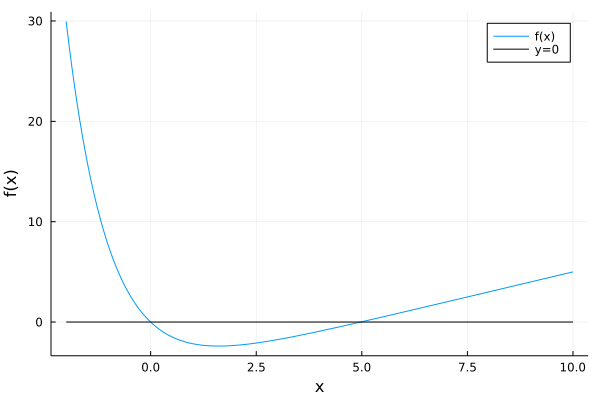

In [3]:
f(x)=5*exp(-x)+x-5
y = LinRange(-2,10,10000)
plot(y,f.(y),label="f(x)")
plot!([-2, 10], [0, 0],color="black",label="y=0")
xlabel!("x")
ylabel!("f(x)")

Vemos que hay 2 raíces. Una cercana a 0 y la otra cercana a 5. Sabemos que

\begin{equation}
    x = \frac{hc}{\lambda_mk_BT}
\end{equation}

Entonces,

\begin{equation}
         \lambda_m=\frac{hc}{Tk_Bx}
\end{equation}

De esta manera, con tolerancia $\epsilon=10^{-6}$ encontramos que

In [4]:
x1=bisection(f, -2, 2)
x2=bisection(f, 2, 7)
println("La longitud es máxima para x=$x1 y para x=$x2")

La longitud es máxima para x=0.0 y para x=4.965114712715149


Como x está en el denominador, no se puede abmitir la solución $x=0$, entonces la única solución posible es $x=4.965114712715149$. Utilizando este resultado, se encuentra que la longitud de onda en la que la intensidad es máxima para distintas temperaturas es

In [5]:
b = h*c_0/(k_B*x2)
λₘ(T)=b/T

println("b=$b.")
println("Para T=$T1, λₘ=$(uconvert(u"nm",λₘ(T1))).")
println("Para T=$T2, λₘ=$(uconvert(u"nm",λₘ(T2))).")
println("Para T=$T3, λₘ=$(uconvert(u"nm",λₘ(T3))).")

b=0.0028977716744778806 K m.
Para T=5000 K, λₘ=579.5543348955762 nm.
Para T=4000 K, λₘ=724.4429186194702 nm.
Para T=3000 K, λₘ=965.9238914926268 nm.


---

# Ejercicio 2, El Punto de Lagrange L1

El punto de Lagrange L1 del sistema Tierra-Luna es aquel lugar en el que la atracción gravitacional de estos dos cuerpos actuando sobre una partícula de prueba se combina de tal manera que se logra un equilibrio con la fuerca centrípeta que mantiene la partícula en su orbita (ver Figura).


Asuma que las orbitas son circulares y que la masa de la Tierra es mucho mayor que la de la Luna (y que la de la partícula de prueba) para mostrar que la distancia r desde el centro de la Tierra hasta el punto L1 satisface la ecuación

\begin{equation}
        \frac{GM}{r^2}-\frac{Gm}{(R-r)^2}=\omega^2r
\end{equation}

donde R es la distance entre la Tierra y la Luna, M y m son las masas de la Tierra y de la Luna, respectivamente, y $\omega$ es la velocidad angular de la Luna y la partícula alrededor de la Tierra.

![Astrofisica Computacional](L1.png)

Claramente esta ecuación es un polinomio de orden 5 en r y por ello su solución debe encontrarse en forma numérica. Escriba un programa que utilice el método de la secante (o Newton-Raphson) para resolver esta ecuación y encontrar la ubicación del punto L1. Para ello considere los siguientes parámetros:
- $G = 6,674 × 10^{−11}$ $m^3$ $kg^{−1}$ $s^{−2}$
- $M = 5,974 × 10^{24}$ $kg$
- $m = 7,348 × 10^{22}$ $kg$
- $R = 3,844 × 10^8$ m
- $\omega = 2,662 × 10^{−6}$ $s^{−1}$

----

Como el punto de Lagrange está siempre entre la tierra y la luna, este se debe mover de forma aproximadamente circular con la misma frecuancia que la luna. Entonces, utilizando la segunda ley de Newton, se tiene que

\begin{equation}
    \begin{split}
        &F=ma,\\
        &\frac{GMm^\prime}{r^2}-\frac{Gmm^\prime}{(R-r)^2}=m^\prime\omega r^2,\\
        &\frac{GM}{r^2}-\frac{Gm}{(R-r)^2}=\omega r^2.\\
    \end{split}
\end{equation}


Donde, r es la distancia tierra punto L1, R la distancia tierra luna, M la masa de la tierra, m la masa de la luna, $m^\prime$ la masa de prueba y $\omega$ la velocidad angular de la luna.

----

Para resolver la ecuación numéricamente, primero se implementa el método de la secante

In [6]:
function secant(f::Function, x0::Number, x1::Number, tol::AbstractFloat=1e-6, maxiter::Integer=200)
    for _ in 1:maxiter
        y1 = f(x1)
        y0 = f(x0)
        x = x1 - y1 * (x1-x0)/(y1-y0)
        if abs(x-x1) < tol
            return x
        end
        x0 = x1
        x1 = x
    end
    error("Max iteration exceeded")
end

secant (generic function with 3 methods)

Ahora, para la minimización se define la función

\begin{equation}
        \frac{GM}{r^2}-\frac{Gm}{(R-r)^2}-\omega^2r=0.
\end{equation}

In [7]:
#La librería de unidades no funciona si coloco la unidad después del exponente.
#Por eso me tocó poner el exponente primero.

G = 10^-11*6.674u"m^3*kg^-1*s^-2"
M = 10^24*5.974u"kg"
m = 10^22*7.348u"kg"
R = 10^8*3.844u"m"
ω = 10^-6*2.662u"s^-1"

function f(r)
    r=(r)u"m" #para que no haya error en las unidades por el método de la secante
    return G*M/r^2-G*m/(R-r)^2-ω^2*r
end

f (generic function with 1 method)

Ahora, hacemos una gráfica para determinar los límites del método

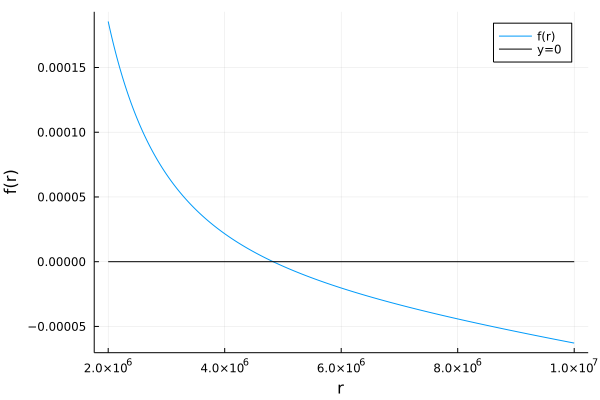

In [8]:
y = LinRange(2*10^6,10^7,1000)
plot(y,ustrip.(f.(y)),label="f(r)")
plot!([2*10^6, 10^7], [0, 0],color="black",label="y=0")
xlabel!("r")
ylabel!("f(r)")

De esta manera, utilizando una tolerancia $\epsilon=10^{-6}$ se obtiene que

In [9]:
println("La solución de la ecuación es r=$(secant(f,10^6,10^7)) m. de La Tierra")

La solución de la ecuación es r=4.830593251640556e6 m. de La Tierra


---

# Ejercicio 3, Periodicidad de las Manchas Solares

En el archivo adjunto llamado ’ManchasSolares.txt’ hay un conjunto de datos con dos columnas: la primera cuenta los meses iniciando en enero de 1749 y la segunda contiene el número de manchas solares mensuales observadas.

## A

Escriba un programa que lea el conjunto de datos y grafique la información contenida. El número de manchas es un indicador de actividad solar. Con ayuda de este gráfico, intente estimar el periodo del ciclo de actividad solar en meses.

---

Lo primero es cargar los datos en memoria

3143


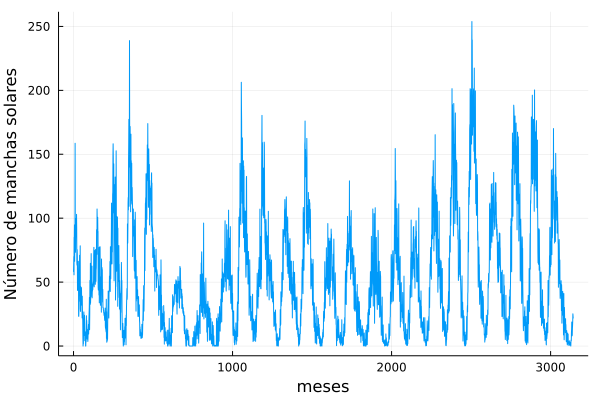

In [10]:
using DelimitedFiles

data=readdlm("ManchasSolares.txt")
meses=data[:,1] 
manchas=data[:,2] 
N=length(meses)
println(N)

plot(meses,manchas,label="")
xlabel!("meses")
ylabel!("Número de manchas solares")

In [11]:
#Hay 24 picos en el rango de tiempo 0-3143 meses
#Entonces el periodo de apararición de los picos es
T=(3143-0)/24
println("T=$(round(T,digits=2)) meses")
println("T=$(round(T/12,digits=1)) años")

T=130.96 meses
T=10.9 años


## B

Escriba una función que calcule la Transformada Discreta de Fourier (DFT) de los datos leidos y realice un gráfico de la magnitud de los coeficientes de Fourier $|c_k|^2$ contra el número k. Este gráfico se denomina Espectro de Potencias de la señal de manchas solares. Identifique el máximo en el gráfico, el cual corresponde a la frecuencia que presenta la mayor amplitud dentro de la serie de Fourier.

---

Hacemos la implementeción de la transformada discreta de Fourier

In [12]:
function DFT(data)
    n=length(data)
    c = complex(zeros(div(n,2)+1))
    for k in 1:div(n,2)+1
        for i in 1:n
            c[k] += data[i]*exp(-2*im*pi*k*i/n)
        end
    end
    return c
end

DFT (generic function with 1 method)

Hacemos la transformada

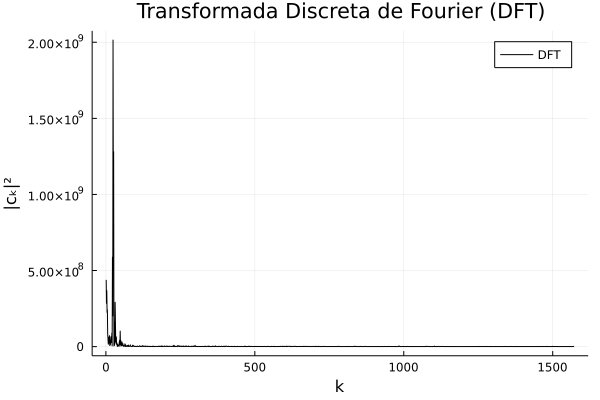

In [13]:
FT=DFT(manchas)
n=length(FT)
psd=FT.*conj.(FT)
freq = LinRange(1,n,n)

plot(freq, real.(psd), color="black",label="DFT")
xlabel!("k")
ylabel!("|cₖ|²")
title!("Transformada Discreta de Fourier (DFT)")

## C

Encuente el valor de k correspondiente al máximo y determine el periodo correspondiente a esta frecuencia. El periodo hallado debe ser similar al que estimó a partir de la gráfica de los datos originales.

---

k es la frecuencia, o sea, cuántas veces se repiten las manchas. En este caso, el índice del array coincide con el número de veces que se repiten los picos en el intervalo de tiempo. 

In [14]:
findmax(real.(psd))

(2.0143371263220747e9, 24)

De esta manera se encuentra que según la transformada de Fourier la frecuencia es 24. Que para el rango de datos coincide exactamente con el estimado del apartado A.

T=130.96 meses

T=10.9 años

## D

Repita el mismo procedimiento utilizando la Transformada Rápida de Fourier FFT (recomiedo que no cree la función sino que utilice una de las implementaciones de la FFT incorporadas en su lenguaje de programación de preferencia).

---

Usando la transformada rápida de Julia se tiene que

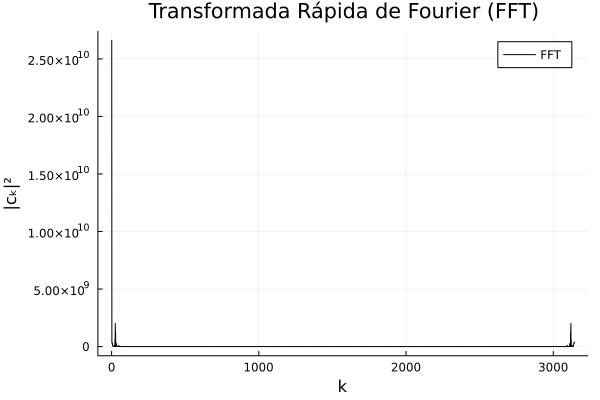

In [15]:
using FFTW

FT=fft(manchas)
n=length(FT)
psd=FT.*conj.(FT)

plot(LinRange(1,n,n), real.(psd), color="black",label="FFT")
xlabel!("k")
ylabel!("|cₖ|²")
title!("Transformada Rápida de Fourier (FFT)")

In [16]:
findmax(real.(psd))

(2.6633815681689995e10, 1)

Sabemos que la frecuencia no puede ser 1 vez cada 3000 meses, entonces vamos a ver el siguiente mayor pico

In [17]:
psd[1]=0
findmax(real.(psd))

(2.0143371263220723e9, 25)

En este caso la frecuencia es 25, lo que implica que $T=\frac{3143}{25}=125.7$ meses, lo que equivale a $T=10.5$ años.

---

# Ejercicio 4, Rejillas de Difracción

En un ejercicio anterior se encontró el patrón de difracción producido en una pantalla por radiación electromagnética con longitud de onda $\lambda$ incidente en una rejilla de difracción con ancho total $w$ y enfocada por una lente de longitud focal $f$. La función correspondiente es

\begin{equation}
    I(x)=\left|\int_{-w/2}^{w/2} \sqrt{q(u)}\;exp\left(\frac{2\pi i xu}{\lambda f}\right)du\;\right|^2.
\end{equation}

donde $x$ es la distancia sobre la pantalla desde el eje central del sistema y $q(u)$ es la función de transmisión de intensidad de la rejilla a una distancia u del eje central (esta función representa la fracción de luz incidente que la rejilla deja atravesar).

En aquel ejercicio se evaluó esta expresión utilizando los métodos usuales de cálculo numérico de integrales. Sin embargo, el mismo resultado puede obtenerse de una forma más eficiente al notar que la integral es en realidad una transformada de Fourier. En efecto, al aproximar la integral utilizando la regla del trapezoide con n nodos (N = n − 1 sub-intervalos) se tiene

\begin{equation}
    \begin{split}
        &I(x)=\left|\int_{-w/2}^{w/2} \sqrt{q(u)}\;exp\left(\frac{2\pi i xu}{\lambda f}\right)du\;\right|^2=\frac{w}{N}\;exp\left(-\frac{i\pi w x}{\lambda f}\right)\sum_{j=0}^{N-1}\sqrt{q(u_j)}exp\left(\frac{2\pi i x_j u}{\lambda f N}\right)=\\
        &=\frac{w}{N}e^{-ik\pi}\sum_{j=0}^{N-1}y_jexp\left(-\frac{i2\pi k_j}{N}\right)
    \end{split}
\end{equation}

donde

\begin{equation}
    \begin{split}
        &u_j=\frac{jw}{N}-\frac{w}{2}\\
        &k=\frac{wx}{\lambda x}
    \end{split}
\end{equation}

y $y_j =\sqrt{q(u_j)}$. Comparando con la definición de la DFT se comprueba que la sumatoria corresponde
al complejo conjugado $c^∗_k$. De esta forma, la intensidad del patrón de interferencia se puede escribir
en la forma

$
I(x_k)=\frac{w^2}{N^2}|c_k|^2,
$

donde

$
x_k=\frac{\lambda f}{w}k.
$

Esta relación muestra que el patrón de intensidad en el punto $x_k$ se encuentra mediante una DFT.
Sin embargo, es importante notar que los valores de $k$ son enteros k = 0, 1, 2, ..., N − 1, y por lo tanto
los puntos $x_k$ en los cuales se evaluará la intensidad están separados por intervalos de tamaño $\frac{\lambda f}{w}$ en la pantalla. Este espaciado puede ser muy ancho para obtener una buena representación del patrón de difracción. Por ejemplo, al tomar los datos del ejercicio anterior; $\lambda$ = 500 nm, $f$ = 1 m y $w$ = 200 $\,u m$; se tiene un espaciamiento de puntos de $\frac{\lambda f}{w}=2.5$ mm, que en una pantalla de 10 cm de ancho
corresponde a solo 40 puntos para graficar.

Una de las formas de para ajustar este inconveniente es incrementar el ancho de la rejilla de $w$ a $W > w$ con lo que el espaciado entre los puntos en la pantalla será mucho menor. Por ejemplo, al tomar W = 10w se incrementará en un factor de 10 el número de puntos en el patrón de difracción. Ahora bien, el espacio agregado a la rejilla debe ser opaco para que no se cambien las propiedades del sistema físico original. Por esta razón, los valores de la función de transferenica en esta nueva región debe ser $y_j$ = 0.

De esta forma, en términos del nuevo ancho de la rejilla se tienen las expresiones

$
I(x_k)=\frac{W^2}{N^2}|c_k|^2,
$

donde

$
x_k=\frac{\lambda f}{W}k
$

y

$
c_k=\sum_{j=0}^{N-1}y_j\;exp\left(\frac{i2\pi k_j}{N}\right).
$

## A

Escriba un código que utilice la FFT para calcular el patrón de difracción para una rejilla con la función de transmisión q(u) = sin2 (αu) con una separación entre slits de 20 µm y con los siguientes parámetros: λ = 500 nm, f = 1 m, w = 200 µm, W = 10w = 2 mm y una pantalla con un ancho total de 10 cm. Elija un número de puntos, n, adecuado para obtener una buena aproximación de la función de transmisión y realice un gráfico del patrón de intensidad en la pantalla en función de la posición x en el rango −5 cm ≤ x ≤ 5 cm. Este patrón debe ser el mismo obtenido en los Ejercicios 01.

----

En primer lugar, se definen las constantes del problema junto con la función de transmisión que es opaca fuera de la región de transmisión.

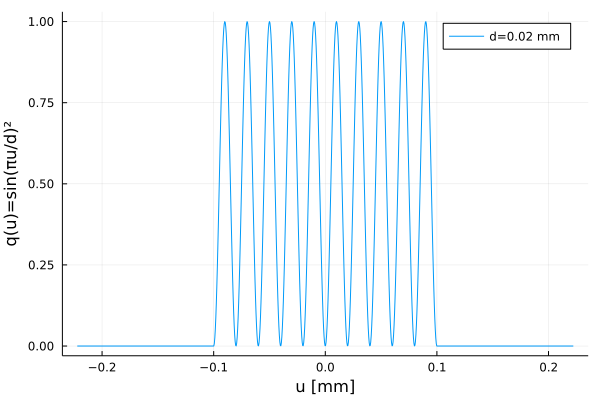

In [18]:
function q(u,d)
    if u<-5*d    #10d/2, caben 10 rejillas
        return 0
    elseif u>5*d #10d/2, caben 10 rejillas
        return 0
    else
        return sin(π*u/d)^2
    end
end

λ=0.0005 #mm -> 500 nm
d=0.02   #mm -> 20 μm
F=1000   #mm -> 1 m
w=d*10   #mm -> 10d el límite de integración más pequeño posible
W=10*w
A= 100   #mm -> 10 cm ancho de la pantalla

x=LinRange(-W/9,W/9,1000)
II=q.(x,d) #d = 20 μm
plot(x, II,label="d=$d mm")
xlabel!("u [mm]")
ylabel!("q(u)=sin(πu/d)²")

Ahora, se define la separación entre los puntos para la transformada de fourier y se hace el array de valores para la transformada.

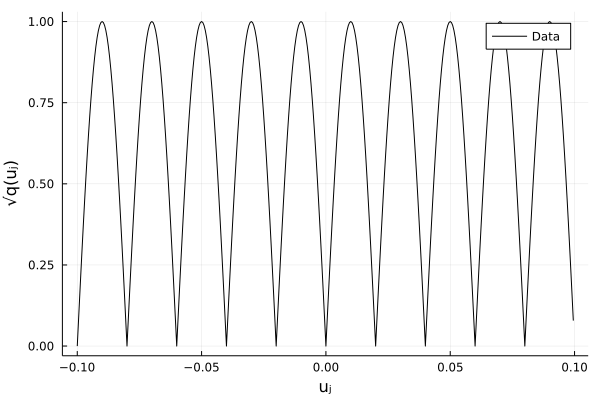

In [59]:
x=λ*F/W
N=trunc(Int, A/x)
k=0:N-1
xₖ=x.*k*1
uⱼ=k.*w/N .-w/2
data = sqrt.(q.(uⱼ,d)) # TODO DA 0, WTF
c = fft(data)
psd = c.*conj.(c)

plot(uⱼ, data, color="black",label="Data") # NO DA EL PATRÓN 
xlabel!("uⱼ")
ylabel!("√q(uⱼ)")

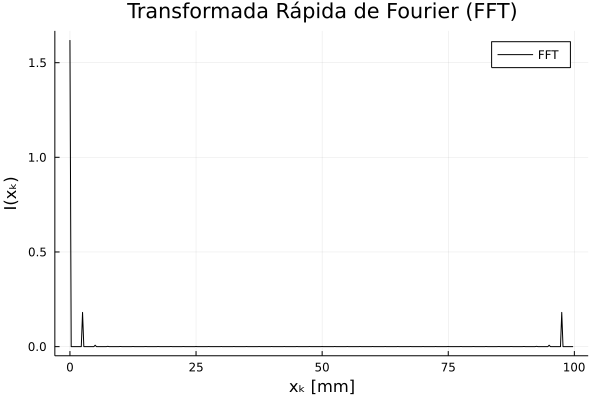

In [61]:
plot(xₖ, W^2 .*real.(psd)./N^2, color="black",label="FFT")
xlabel!("xₖ [mm]")
ylabel!("I(xₖ)")
title!("Transformada Rápida de Fourier (FFT)")